# 통계 & NumPy 과제 2024/02/19
데이터 출처 : https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

In [1]:
import pandas as pd
import numpy as np

%precision 3

'%.3f'

In [2]:
filename = 'iris.csv'
irisDF = pd.read_csv(filename)
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
# 1. 주어진 데이터의 공분산을 계산하시오.
iris_covDF = pd.DataFrame(columns=['col1', 'col2', '공분산'])
ii = irisDF.dtypes[irisDF.dtypes == 'float64'].index
cnt = 0
for i in range(len(ii)-1):
    for j in range(i+1, len(ii)):
        iris_covDF.loc[cnt] = [ii[i], ii[j], np.cov(irisDF[ii[i]], irisDF[ii[j]])[0, 1]]
        cnt += 1

print(iris_covDF)

           col1          col2       공분산
0  sepal_length   sepal_width -0.039268
1  sepal_length  petal_length  1.273682
2  sepal_length   petal_width  0.516904
3   sepal_width  petal_length -0.321713
4   sepal_width   petal_width -0.117981
5  petal_length   petal_width  1.296387


In [51]:
# 2. 주어진 데이터의 상관계수를 계산하시오.
iris_corrDF = pd.DataFrame(columns=['col1', 'col2', '상관관계'])
ii = irisDF.dtypes[irisDF.dtypes == 'float64'].index
cnt = 0
for i in range(len(ii)-1):
    for j in range(i+1, len(ii)):
        iris_corrDF.loc[cnt] = [ii[i], ii[j], np.corrcoef(irisDF[ii[i]], irisDF[ii[j]])[0, 1]]
        cnt += 1
iris_corrDF

,col1,col2,상관관계
0,sepal_length,sepal_width,-0.109369
1,sepal_length,petal_length,0.871754
2,sepal_length,petal_width,0.817954
3,sepal_width,petal_length,-0.420516
4,sepal_width,petal_width,-0.356544
5,petal_length,petal_width,0.962757


In [86]:
import matplotlib.pyplot as plt

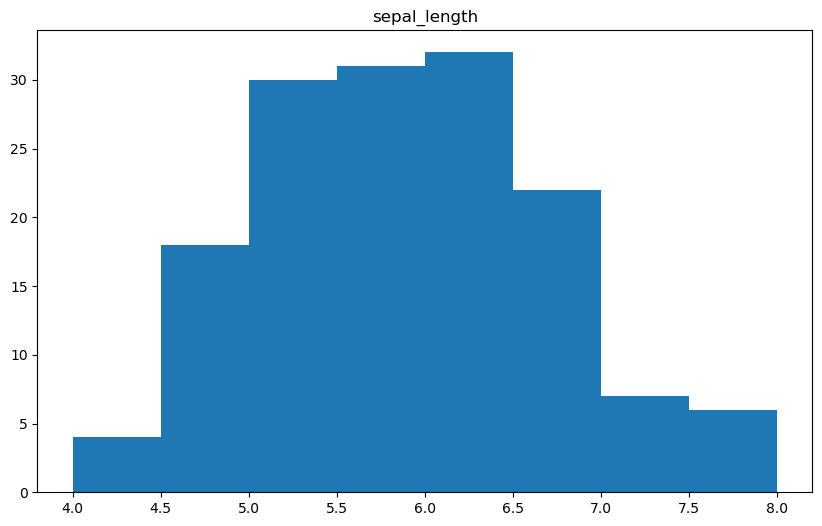

In [87]:
# 3. 각 특성별로 히스토그램을 그려보시오. (sepal_length)
BINS = 8
col_name = 'sepal_length'
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(irisDF[col_name], bins=BINS, range=(4, 8))
ax.set_xticks(np.linspace(4, 8, BINS+1))
ax.set_title(col_name)
plt.show()

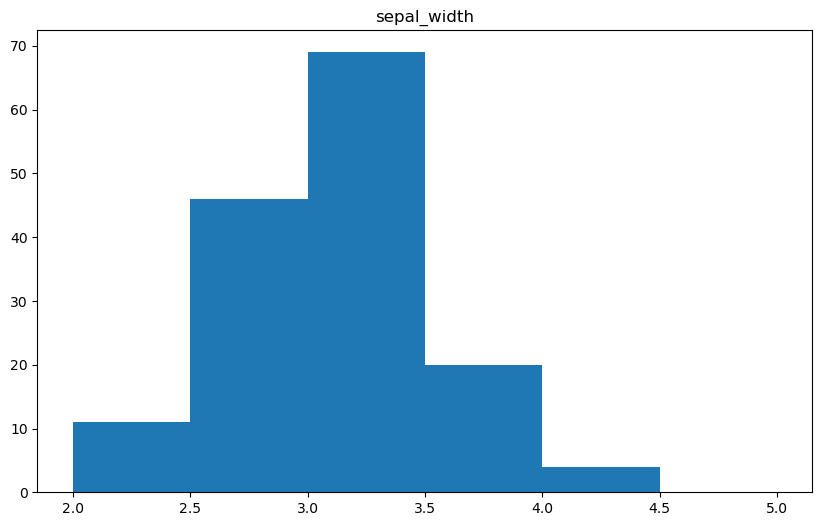

In [88]:
# 3. 각 특성별로 히스토그램을 그려보시오. (sepal_width)
BINS = 6
col_name = 'sepal_width'
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(irisDF[col_name], bins=BINS, range=(2, 5))
ax.set_xticks(np.linspace(2, 5, BINS+1))
ax.set_title(col_name)
plt.show()

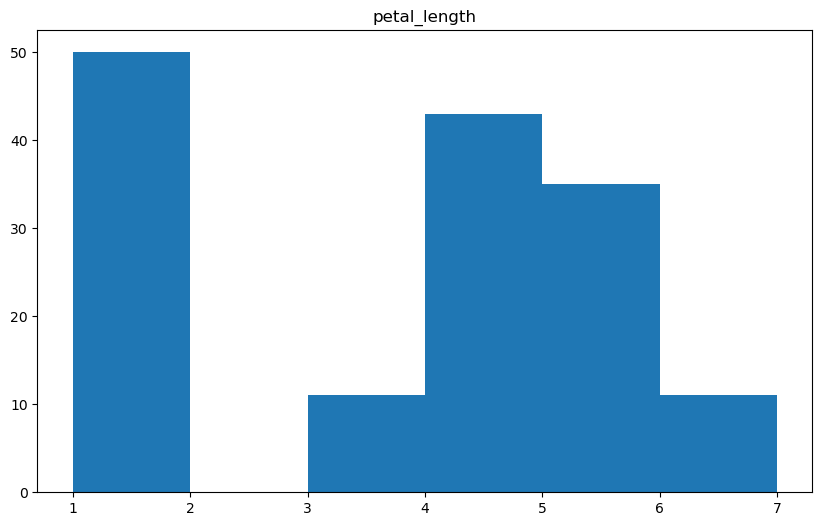

In [89]:
# 3. 각 특성별로 히스토그램을 그려보시오. (petal_length)
BINS = 6
col_name = 'petal_length'
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(irisDF[col_name], bins=BINS, range=(1, 7))
ax.set_xticks(np.linspace(1, 7, BINS + 1))
ax.set_title(col_name)
plt.show()

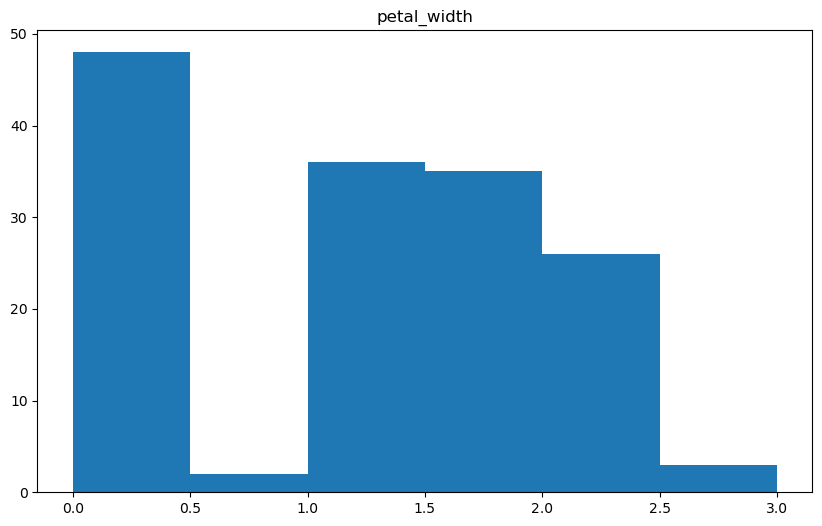

In [90]:
# 3. 각 특성별로 히스토그램을 그려보시오. (petal_width)
BINS = 6
col_name = 'petal_width'
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(irisDF[col_name], bins=BINS, range=(0, 3))
ax.set_xticks(np.linspace(0, 3, BINS + 1))
ax.set_title(col_name)
plt.show()

In [153]:
# 4. 각 품종별로 특성(꽃받침 길이/너비, 꽃잎 길이/너비)에 대한 상자그림(boxplot)을 그려보시오.
def boxplot_by_species(species):
    # 2x2 영역에 표시
    float_cols = irisDF.dtypes[irisDF.dtypes == 'float64'].index
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                             sharex=False, sharey=False)
    fig.suptitle(species, fontsize=15)
    flower_condition = (irisDF['species'] == species)
    for i, col in enumerate(float_cols):
        # 그리는 영역을 선택
        ax = axes[i//2 , i%2]
        ax.boxplot(irisDF[flower_condition][col], labels=[col])
    
    # 그래프 사이의 간격을 좁힌다.
    plt.tight_layout()
    plt.show()

In [161]:
def boxplot_by_species2(species):
    # 하나의 표 안에 그리기
    fig = plt.figure(figsize=(10, 6))
    
    flower_condition = (irisDF['species'] == species)
    plt.boxplot(irisDF[flower_condition][list(irisDF.columns[:-1])])
    plt.xticks(ticks=range(1, len(irisDF.columns[:-1])+1), labels=irisDF.columns[:-1])
    plt.title(species)
    plt.show()

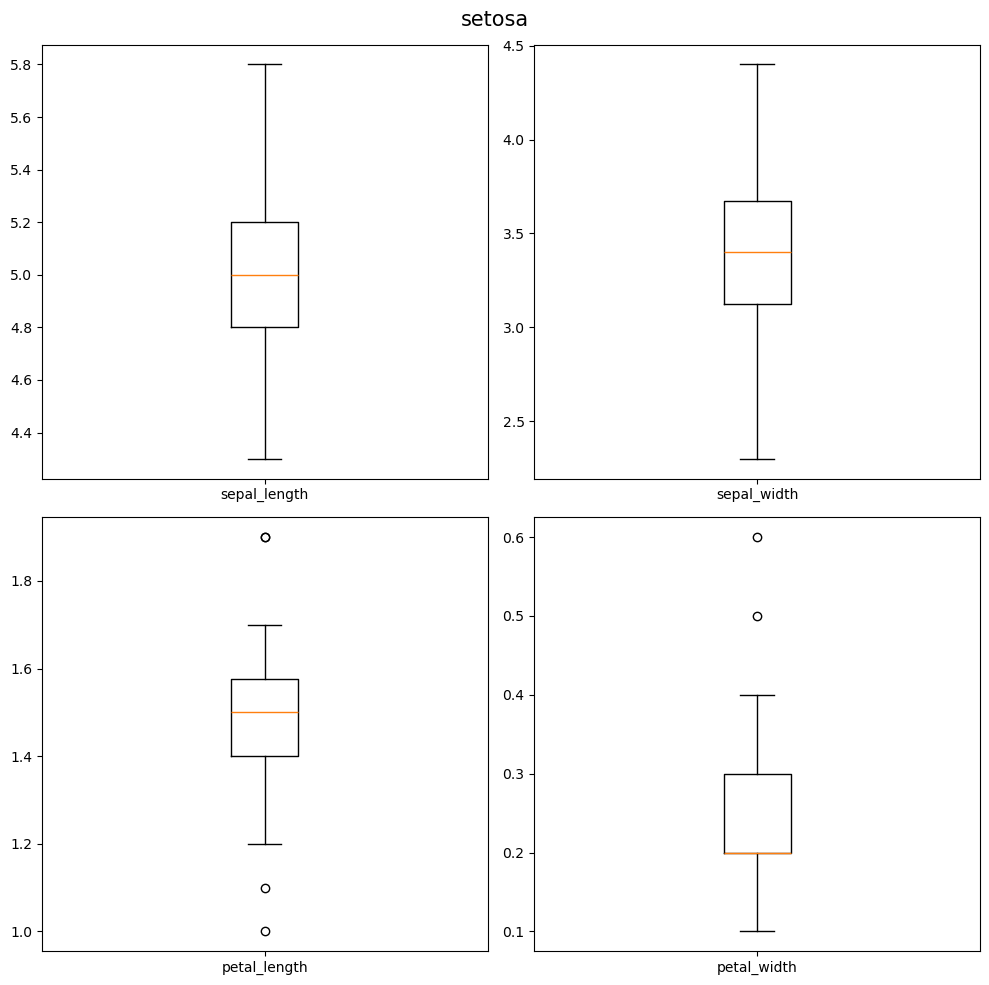

In [165]:
# 'setosa'
boxplot_by_species('setosa')

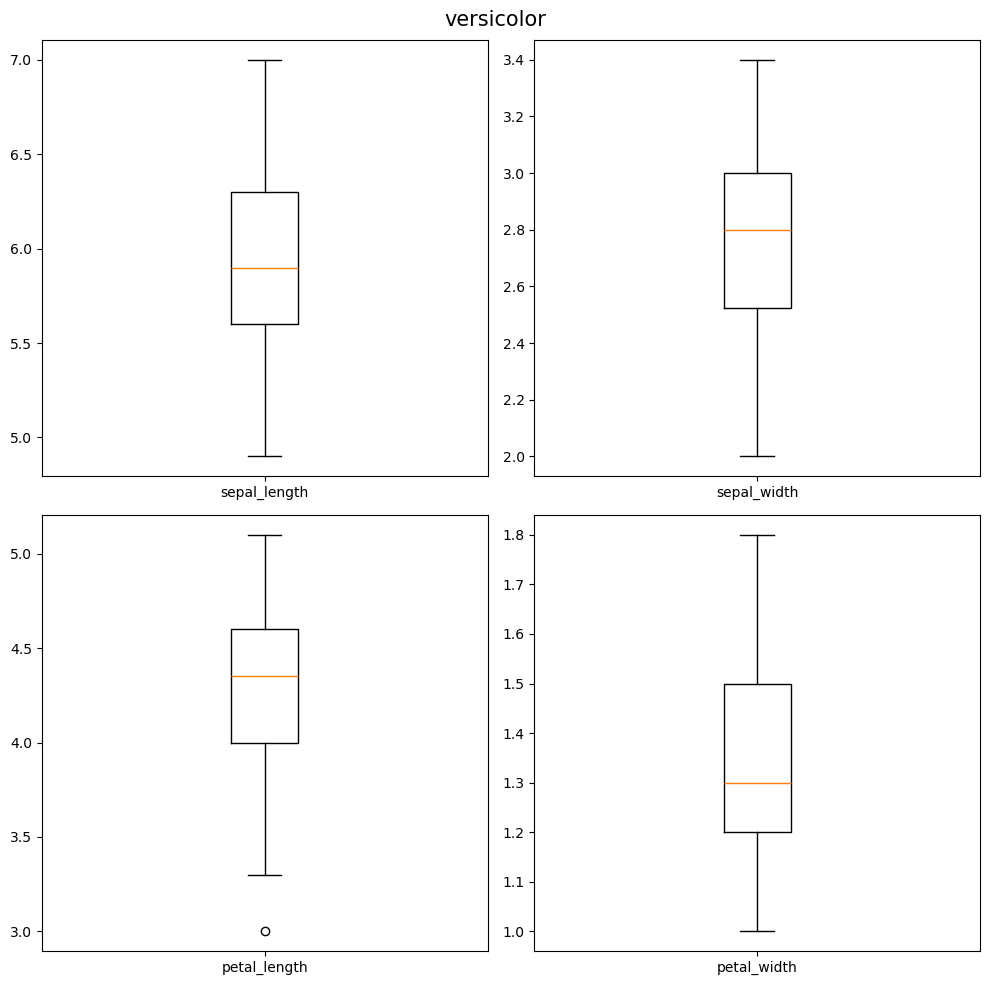

In [167]:
# 'versicolor'
boxplot_by_species('versicolor')

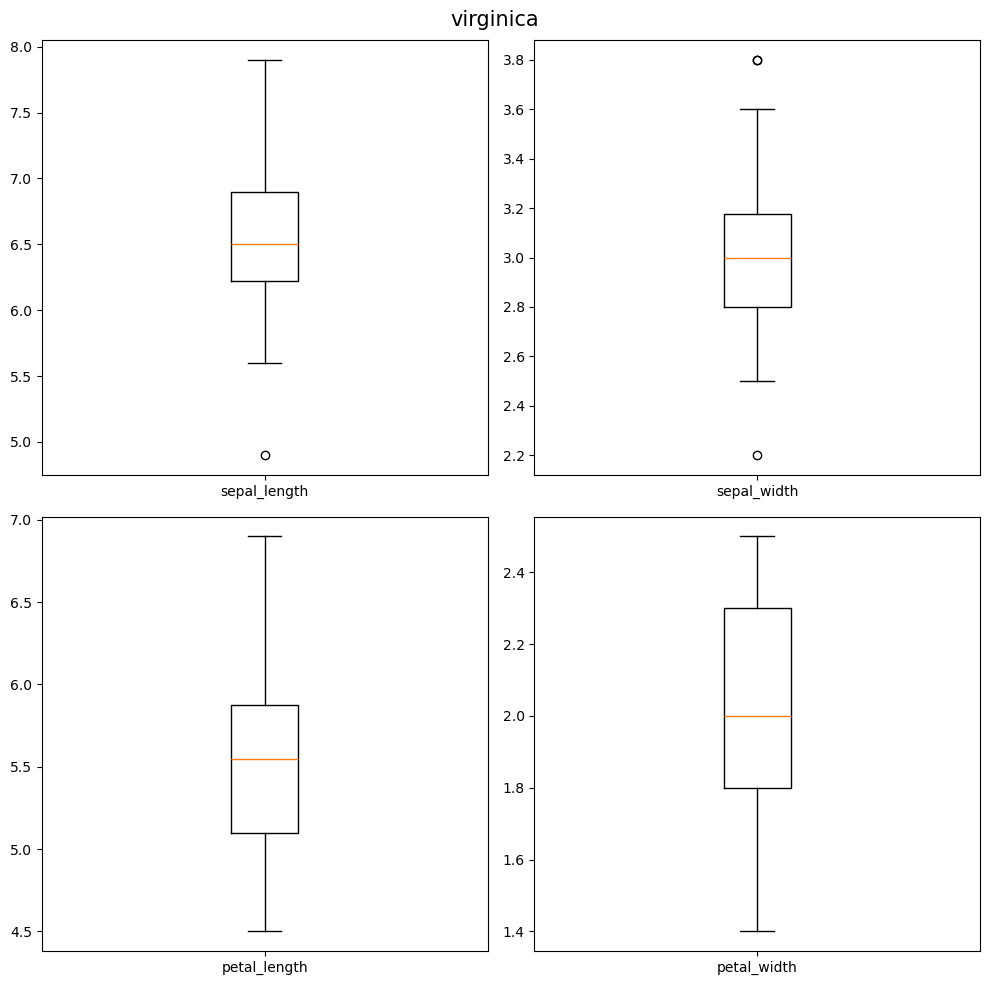

In [169]:
# 'virginica'
boxplot_by_species('virginica')

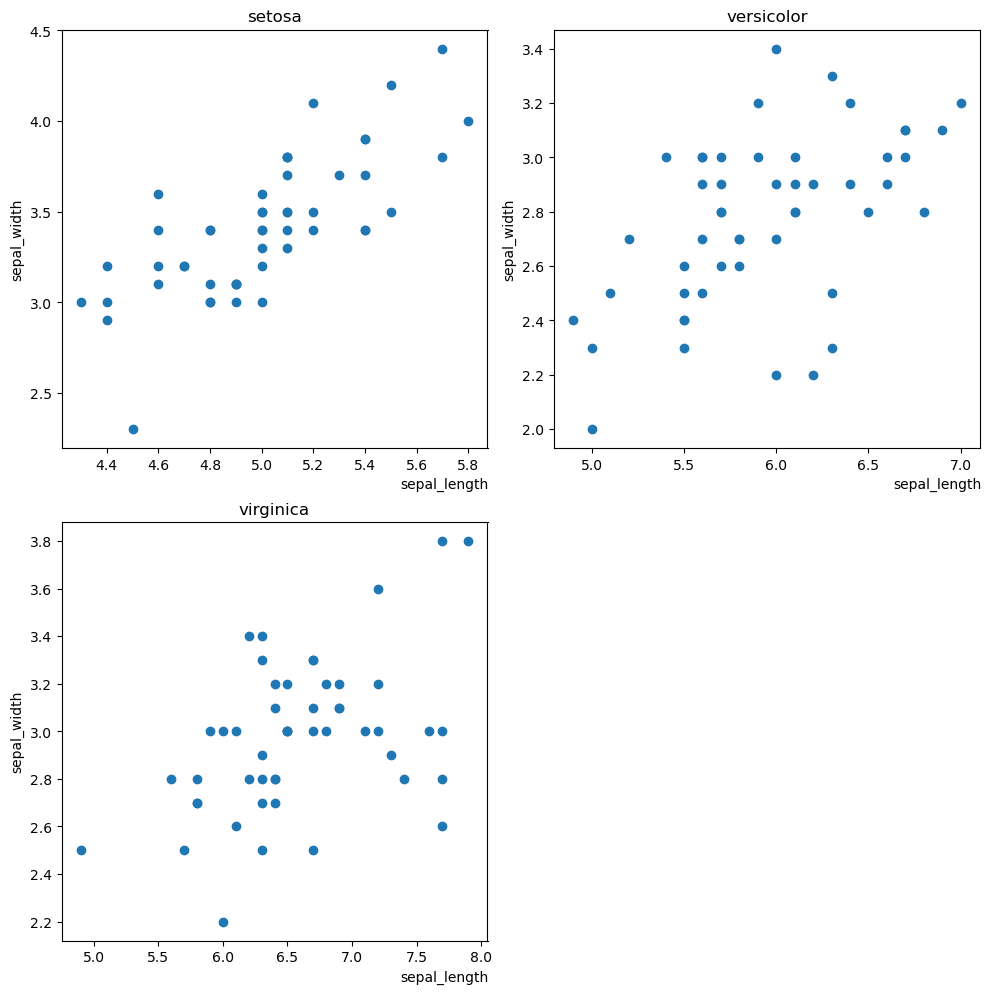

In [149]:
# 5. 각 품종별로 꽃받침 길이와 꽃받침 너비의 관계를 산점도로 나타내고, 색상으로 품종을 구분하시오.
species = irisDF['species'].unique()
fig = plt.figure(figsize=(10, 10))

for i, s in enumerate(species):
    flower_condition = (irisDF['species'] == s)
    ax = fig.add_subplot(2, 2, i+1)
    ax.scatter(irisDF[flower_condition]['sepal_length'], irisDF[flower_condition]['sepal_width'])
    ax.set_xlabel('sepal_length')
    ax.set_ylabel('sepal_width')
    ax.xaxis.set_label_coords(0.9, -0.07)   # x축 라벨 위치(좌표) 재설정
    ax.set_title(s)
plt.tight_layout()
plt.show()